In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
ds = pd.read_csv("Admission_Predict.csv")
ds

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
x = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [49]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.58696876, 0.12780879])

Text(0, 0.5, 'Second Principal Component')

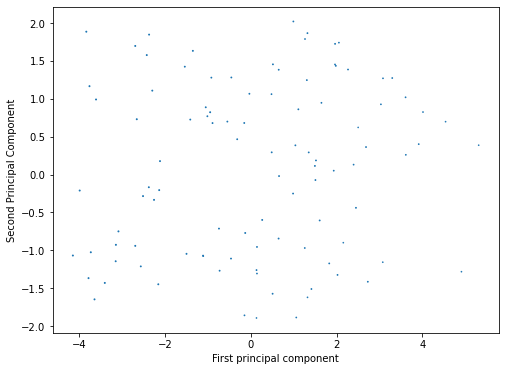

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(x_test[:,0],x_test[:,1],y_test,cmap='spring')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [59]:
reg = LinearRegression()
reg.fit(x_train,y_train)

pred = reg.predict(x_test)

In [52]:
f_imp = reg.coef_
for i, v in enumerate(f_imp):
    print('Feature: %0d, Score:%f'%(i,v*10))

Feature: 0, Score:-0.571500
Feature: 1, Score:0.146008


Text(0.5, 0, 'Chance of admit')

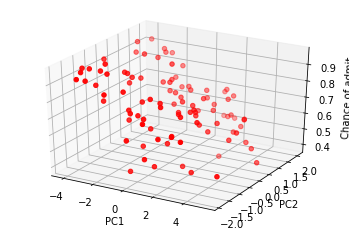

In [60]:
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,c = 'red')
#ax.plot3D(x_test[:,0],x_test[:,1],pred,c = 'blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Chance of admit')

Text(0, 0.5, 'Chance of admit')

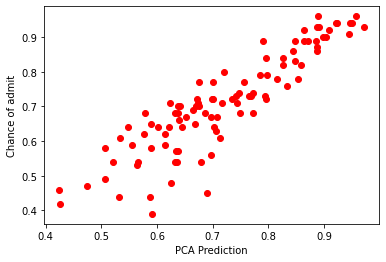

In [58]:
plt.scatter(pred,y_test,color='red');
#plt.plot(pred,y_test,color='blue')
plt.xlabel('PCA Prediction')
plt.ylabel('Chance of admit')

In [55]:
test_set_mse = mean_squared_error(y_test,pred)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

print("Squared Mean Error= ", test_set_mse)
print("Root Squared Mean Error= ", test_set_rmse)
print("Coefficient of Determination= ", test_set_r2)

Squared Mean Error=  0.0039944507218841515
Root Squared Mean Error=  0.06320166708152683
Coefficient of Determination=  0.8046723363381834


In [56]:
print("Accuracy Acheived= ", reg.score(x_test,y_test)*100,"%!")

Accuracy Acheived=  80.46723363381834 %!
